In [496]:
#import math
import os
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from matplotlib import cm
#from scipy.optimize import curve_fit
#from scipy import special

In [497]:
os.remove("./Ising_crea_cputime.txt")
os.remove("./Ising_diagonalize_cputime.txt")
os.remove("./first-k-eigenvals.txt")

In [498]:
list_lambda = np.arange(0, 3.05, 0.05)
list_Nbodies = np.arange(2, 12, 1)
#innerdim = 2
LL = np.size(list_lambda)
NN = np.size(list_Nbodies)

In [499]:
for jj in list_Nbodies:
    for ii in list_lambda:
        output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {}".format(jj, ii), 
                        stdout=subprocess.PIPE, encoding="utf-8")
        print(jj, ii)

2 0.0
2 0.05
2 0.1
2 0.15000000000000002
2 0.2
2 0.25
2 0.30000000000000004
2 0.35000000000000003
2 0.4
2 0.45
2 0.5
2 0.55
2 0.6000000000000001
2 0.65
2 0.7000000000000001
2 0.75
2 0.8
2 0.8500000000000001
2 0.9
2 0.9500000000000001
2 1.0
2 1.05
2 1.1
2 1.1500000000000001
2 1.2000000000000002
2 1.25
2 1.3
2 1.35
2 1.4000000000000001
2 1.4500000000000002
2 1.5
2 1.55
2 1.6
2 1.6500000000000001
2 1.7000000000000002
2 1.75
2 1.8
2 1.85
2 1.9000000000000001
2 1.9500000000000002
2 2.0
2 2.0500000000000003
2 2.1
2 2.15
2 2.2
2 2.25
2 2.3000000000000003
2 2.35
2 2.4000000000000004
2 2.45
2 2.5
2 2.5500000000000003
2 2.6
2 2.6500000000000004
2 2.7
2 2.75
2 2.8000000000000003
2 2.85
2 2.9000000000000004
2 2.95
2 3.0
3 0.0
3 0.05
3 0.1
3 0.15000000000000002
3 0.2
3 0.25
3 0.30000000000000004
3 0.35000000000000003
3 0.4
3 0.45
3 0.5
3 0.55
3 0.6000000000000001
3 0.65
3 0.7000000000000001
3 0.75
3 0.8
3 0.8500000000000001
3 0.9
3 0.9500000000000001
3 1.0
3 1.05
3 1.1
3 1.1500000000000001
3 1.2000

In [500]:
ham_init_time = pd.read_csv("./Ising_crea_cputime.txt", sep="\t", comment='#', names=["Lambda", "particles", "time"])
gb_init_time = ham_init_time.groupby('particles')
for val, dataframe in gb_init_time:
    dataframe.drop('particles', axis=1, inplace=True)
    dataframe.to_csv(f"./group-data/Initialization_time/#particles={val}.csv", index = False) 

In [501]:
ham_diag_time = pd.read_csv("./Ising_diagonalize_cputime.txt", sep="\t", comment='#', names=["Lambda", "particles", "time"])
gb_diag_time = ham_diag_time.groupby('particles')
print(gb_diag_time.get_group(2))
for val, dataframe in gb_diag_time:
    dataframe.drop('particles', axis=1, inplace=True)
    dataframe.to_csv(f"./group-data/Diagonalization_time/#particles={val}.csv", index = False) 

    Lambda  particles      time
0     0.00          2  0.000091
1     0.05          2  0.000055
2     0.10          2  0.000056
3     0.15          2  0.000046
4     0.20          2  0.000050
..     ...        ...       ...
56    2.80          2  0.000059
57    2.85          2  0.000081
58    2.90          2  0.000061
59    2.95          2  0.000054
60    3.00          2  0.000062

[61 rows x 3 columns]


In [502]:
k_eigenval = pd.read_csv("./first-k-eigenvals.txt", sep="\t", comment='#', names=["Lambda", "particles", "eigenvals"])
gb_keigenv = k_eigenval.groupby('particles')
#print(gb_keigenv.get_group(3))
for val, dataframe in gb_keigenv:
    dataframe = dataframe.drop('particles', axis=1)
    dataframe[['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6' ]] = dataframe.eigenvals.str.split("\s\s\s\s\s", expand= True)
    dataframe = dataframe.drop('eigenvals', axis= 1)
    dataframe.to_csv(f"./group-data/Eigenvalues/#particles={val}.csv", index = False, sep=',') 

In [503]:
def plot_3d(data, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_trisurf(data.Lambda, data.particles, np.log(data.time), cmap=cm.jet, linewidth=0.2)
    plt.title(f"{title}",fontsize = 20)
    plt.xlabel("\u03BB", fontsize = 15)
    plt.ylabel("# Particles",fontsize = 15)
    ax.set_zticks([])
    #fig.colorbar(surf, shrink=0.3, aspect=5, orientation = "horizontal", anchor = (0.5,2.5), label = "Log (Time)")
    fig.colorbar(surf, shrink=0.3, aspect=5, orientation = "vertical", anchor = (-0.8,0.565), label = "Log (Time)")
    plt.legend()

    plt.savefig(f'./Plots/{title}.png', bbox_inches="tight")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


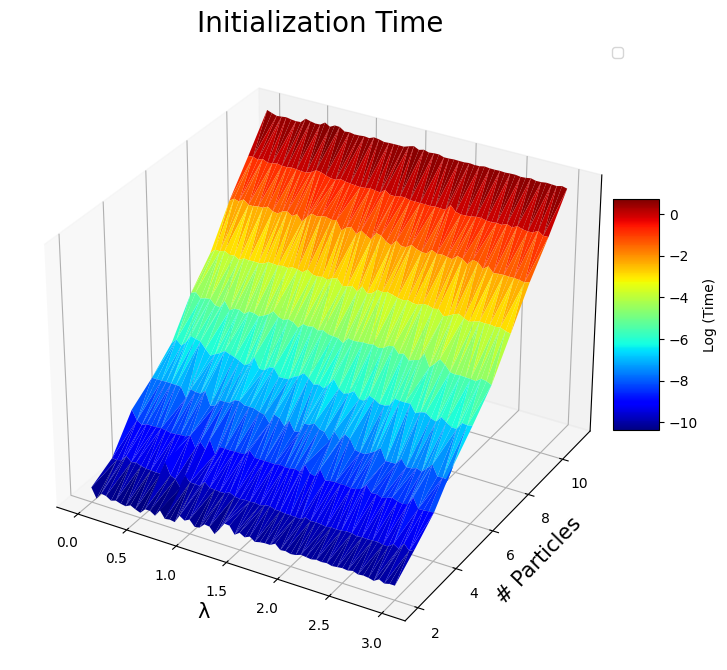

In [504]:
plot_3d(ham_init_time, "Initialization Time")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


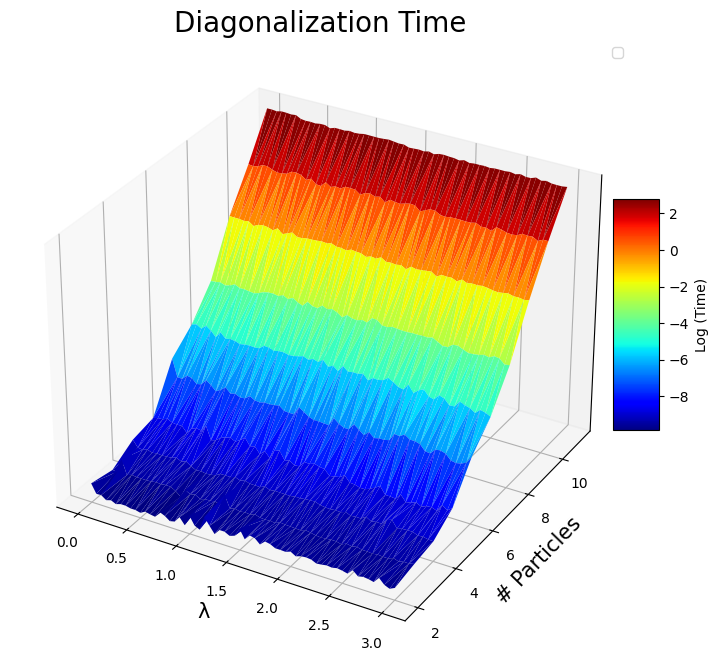

In [505]:
plot_3d(ham_diag_time, "Diagonalization Time")

In [506]:
def plot_2d(gb_data):
    plt.figure(figsize=(10, 5))
    plt.title(r"Initialization time")
    plt.imshow(gb_data, extent=[list_lambda[0], list_lambda[-1], list_Nbodies[0], list_Nbodies[-1]], origin="lower", cmap="cool", aspect="auto")
    plt.xlabel("X coordinate [a.u]")
    plt.ylabel("Time [a.u]")
    cbar = plt.colorbar(orientation='horizontal', fraction = 0.05)

    plt.legend()

    #plt.savefig(f'./Plots/sqnorm(t)[{t[0]:2.0f}, {t[-1]:2.0f}].png', bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


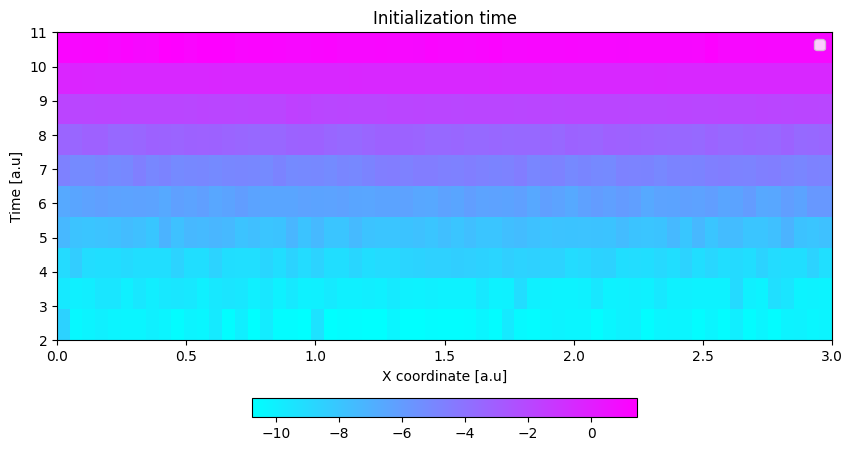

In [507]:
plot_2d(np.log(z_arr))

In [522]:
N_eigen = np.zeros((NN, LL, 7))
for ii, N in enumerate(list_Nbodies):
    N_eigen[ii, :, :] = np.loadtxt(f"./group-data/Eigenvalues/#particles={N}.csv", delimiter=",", skiprows= 1)
    print(ii)

print(N_eigen[0,1,:])

0
1
2
3
4
5
6
7
8
9
[ 0.05       -1.00498756 -1.          1.          1.00498756  0.
  0.        ]


In [561]:
def plot_eigen(eigen, N):

    #popt, pcov = curve_fit(linear, list_sep, sep_time) #, p0 = [1., 0.])
    #err = np.sqrt(pcov)
    indx = N+list_Nbodies[0]
    plt.figure(figsize=(10, 5))
    plt.title(f"First 6-Eigenvalues with N = {indx}")
    plt.ylabel("Eigenvalues")
    plt.xlabel("\u03BB", fontsize = 15)

    for ii in np.arange(1,7,1):
        plt.plot(eigen[:, 0], eigen[:,ii], marker='.', label = f'eigenvalue = {ii}') #'#002FD0'
        if (N == 0 and ii == 4): 
            plt.title(f"First 4-Eigenvalues with N = {indx}")
            break

    plt.legend()
    plt.savefig(f'./Plots/Eigenvalues_N={indx}.png', bbox_inches="tight")
    plt.show()

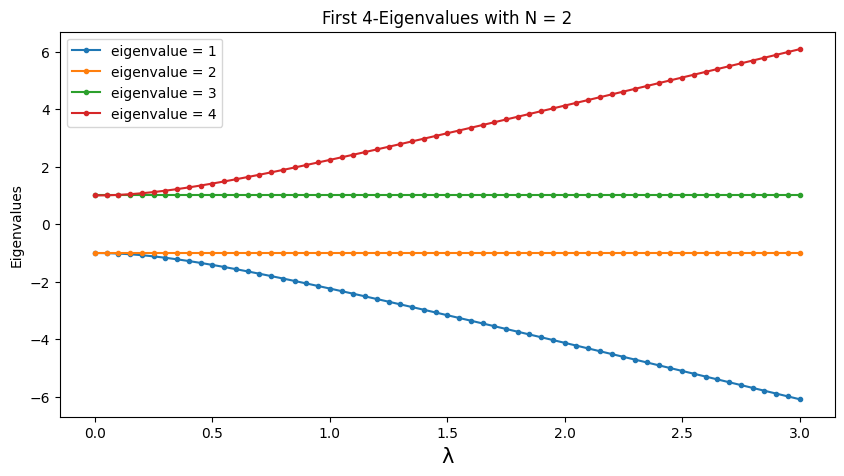

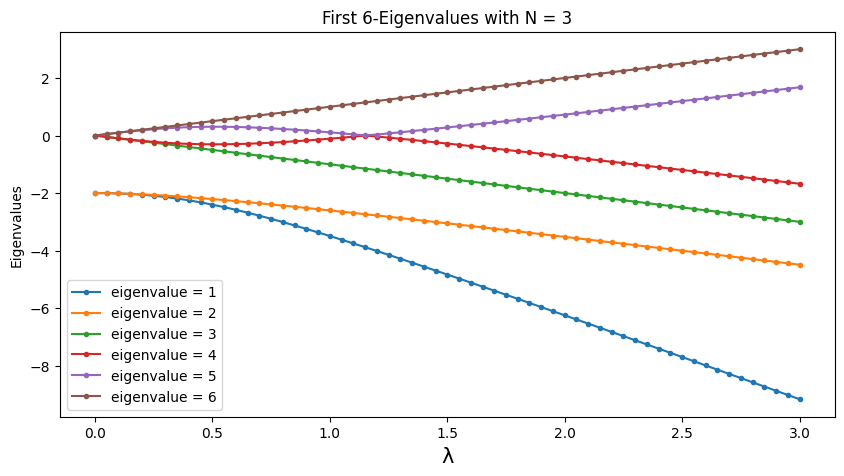

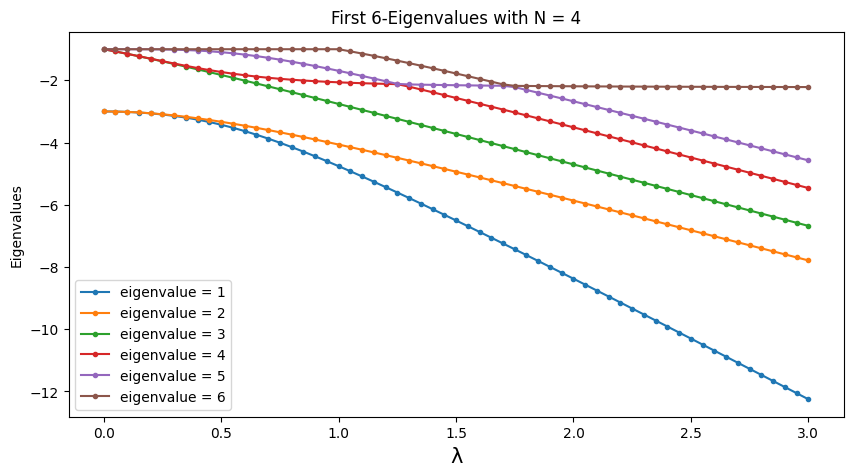

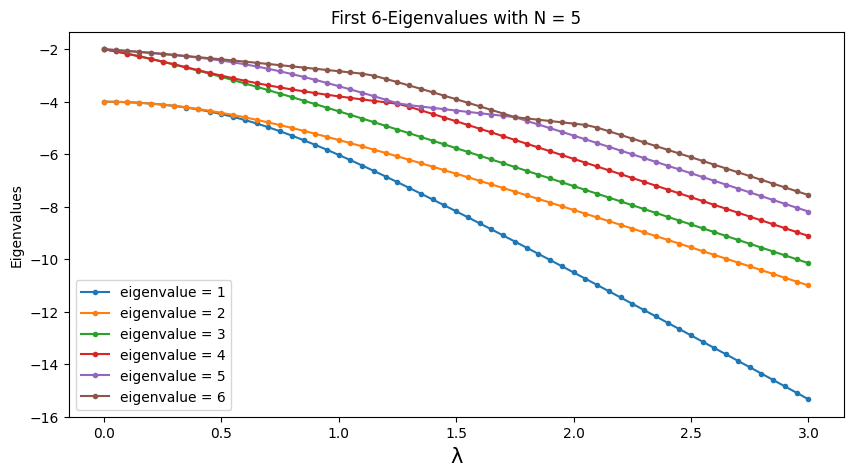

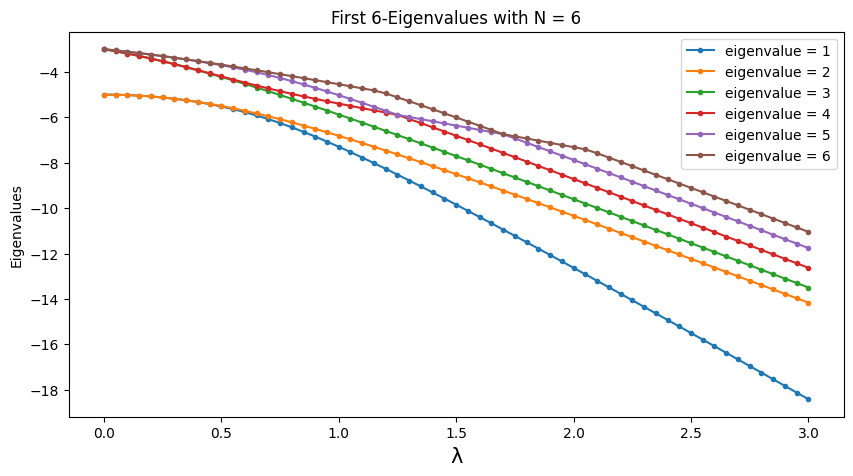

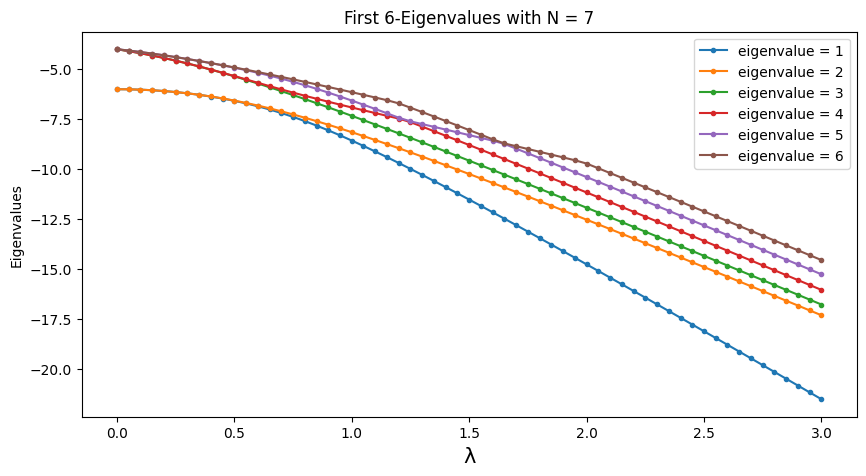

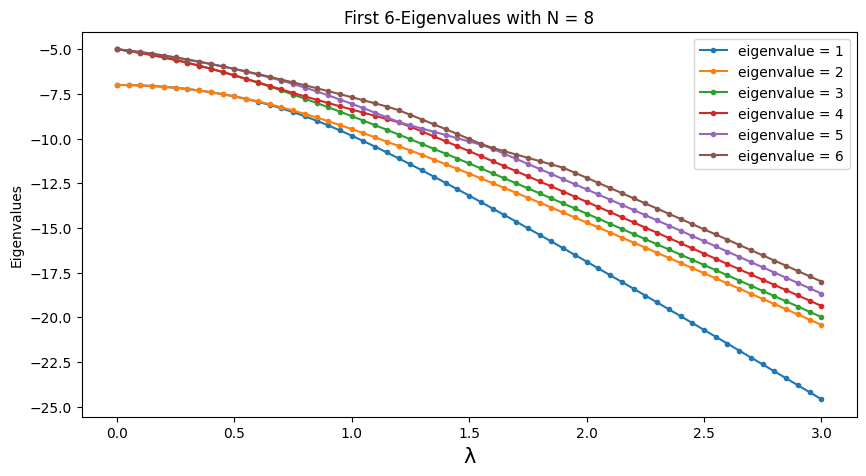

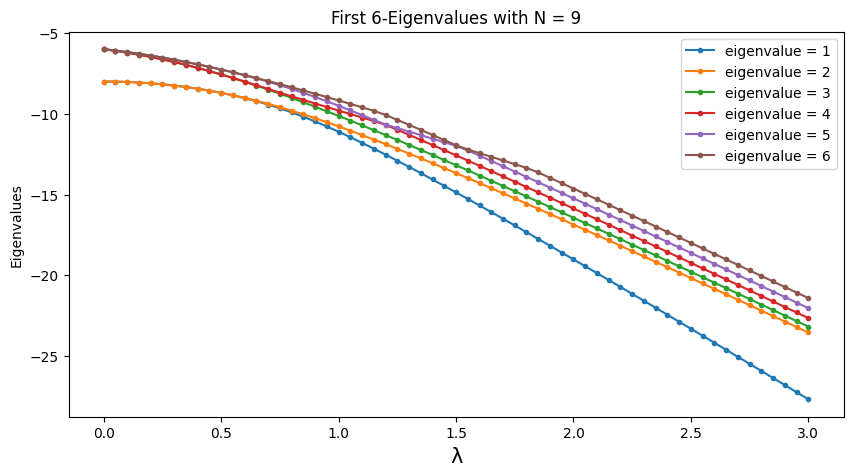

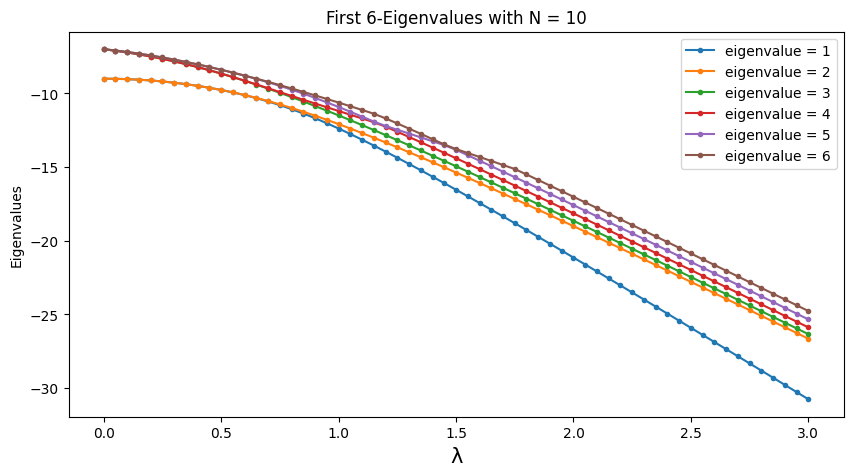

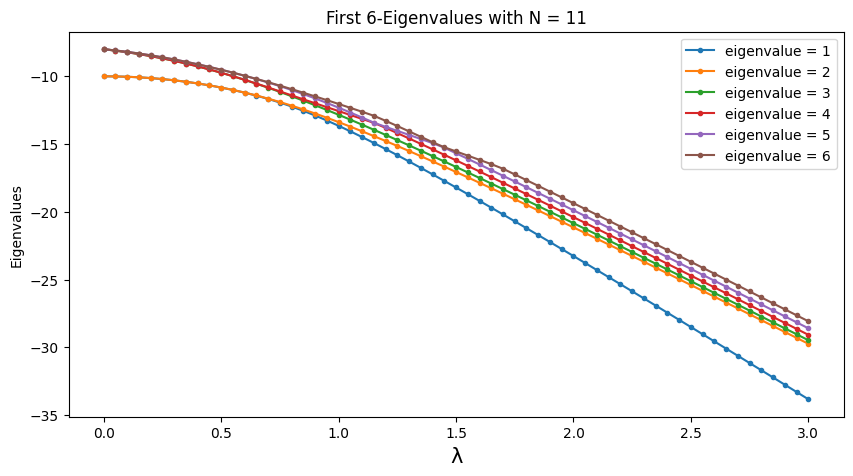

In [562]:
for ii in np.arange(0,10,1):
    plot_eigen(N_eigen[ii], ii)

In [547]:
def plot_log_eigen(eigen, N):

    #popt, pcov = curve_fit(linear, list_sep, sep_time) #, p0 = [1., 0.])
    #err = np.sqrt(pcov)
    indx = N+list_Nbodies[0]
    plt.figure(figsize=(10, 5))
    plt.title(f"First 6-Eigenvalues with N = {indx}")
    plt.ylabel("Eigenvalues")
    plt.xlabel("\u03BB", fontsize = 15)

    for ii in np.arange(1,7,1):
        plt.plot(np.log(eigen[:, 0]), eigen[:,ii], marker='.', label = f'eigenvalue = {ii}') #'#002FD0'
        if (N == 0 and ii == 4): 
            plt.title(f"First 4-Eigenvalues with N = {indx}")
            break

    plt.legend()
    plt.savefig(f'./Plots/log_Eigenvalues_N={indx}.png', bbox_inches="tight")
    plt.show()

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_20379/3438566466.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(eigen[:, 0]), eigen[:,ii], marker='.', label = f'eigenvalue = {ii}') #'#002FD0'


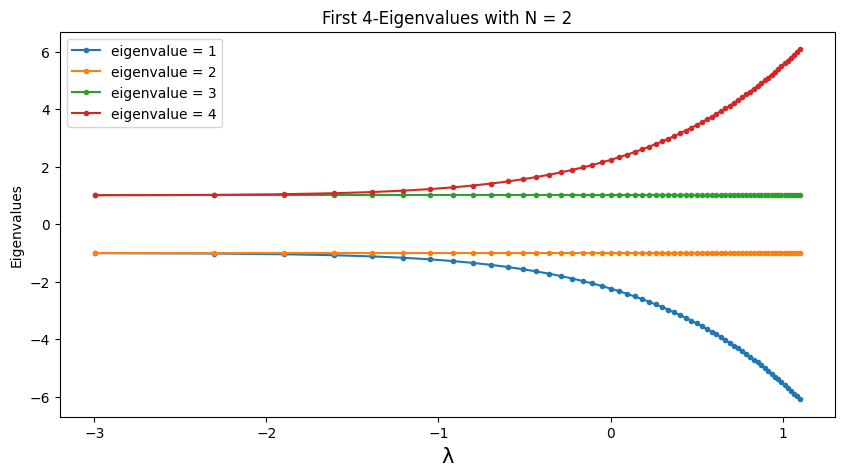

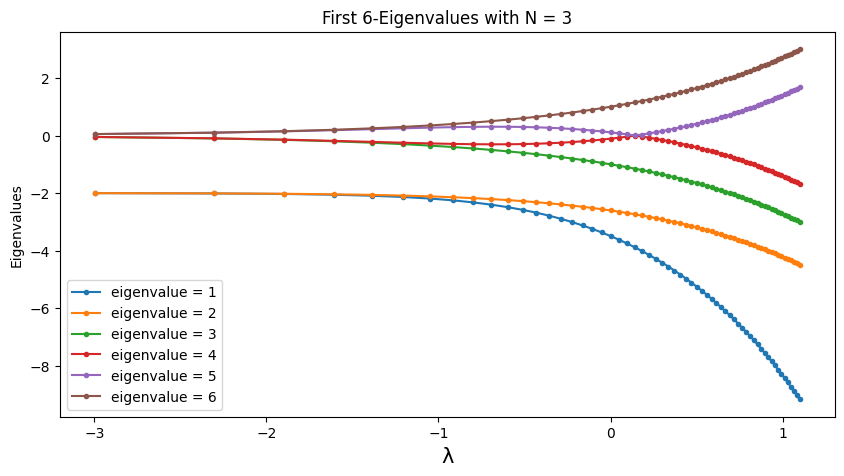

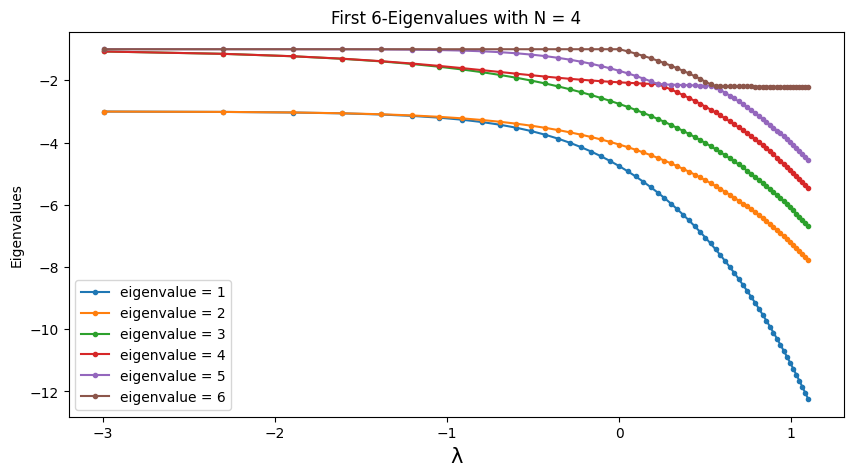

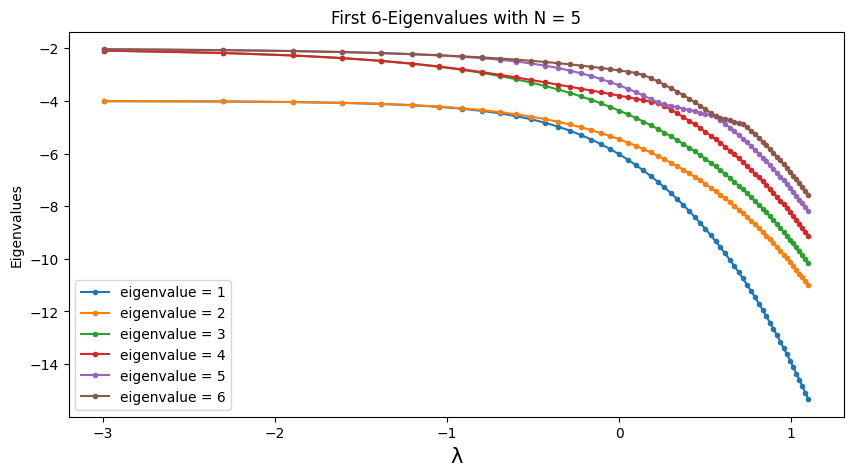

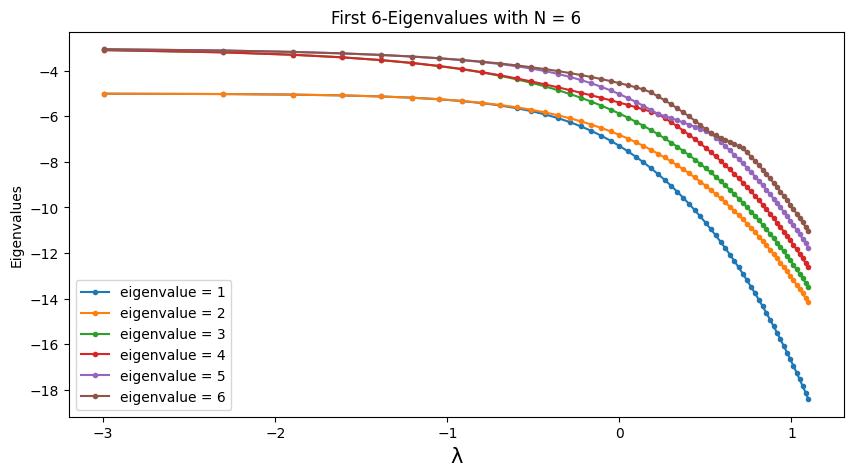

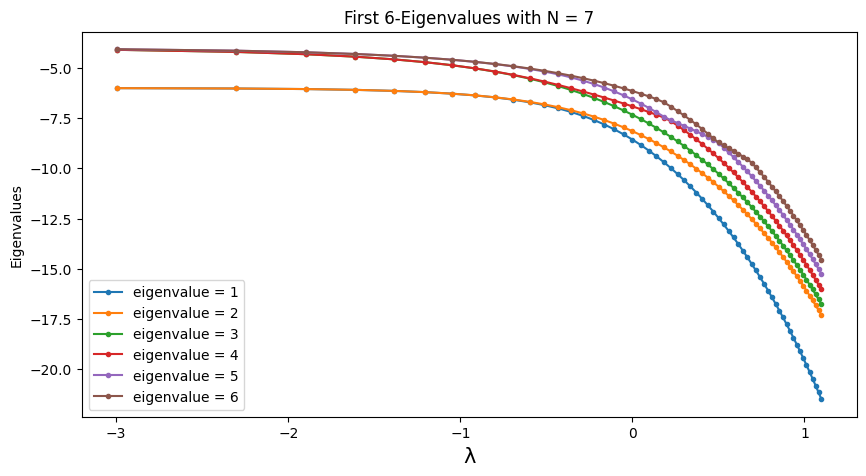

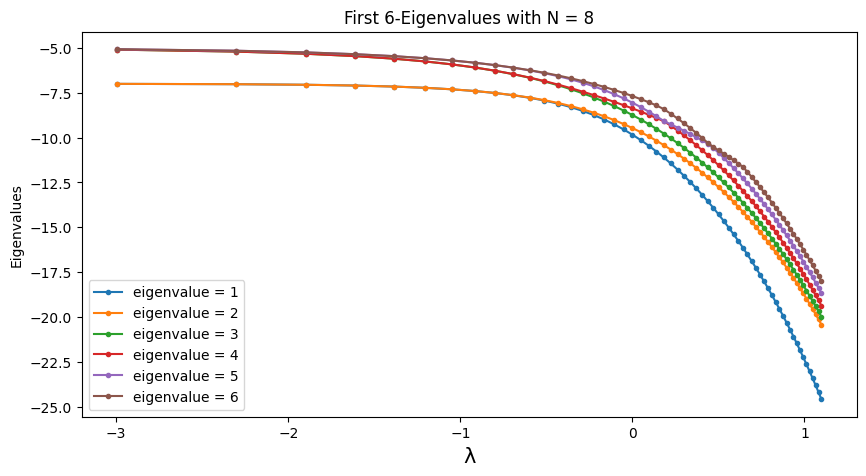

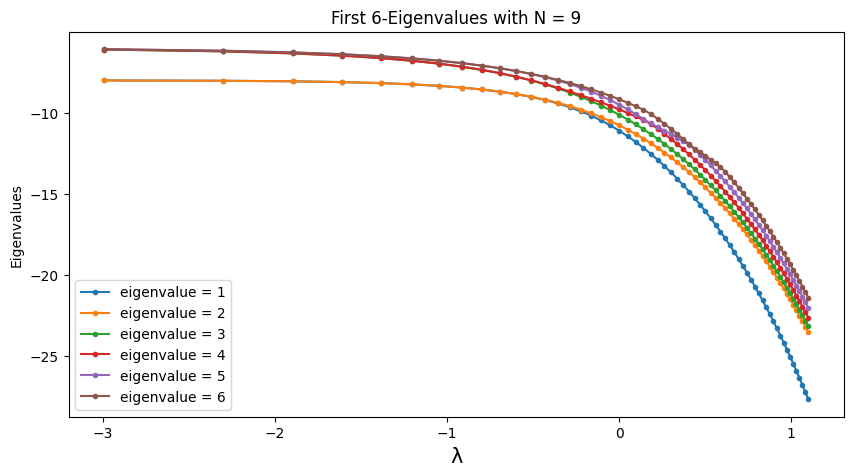

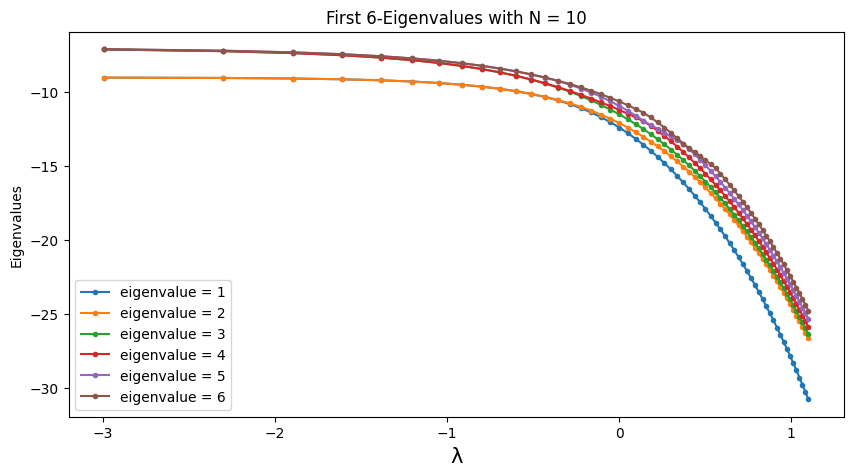

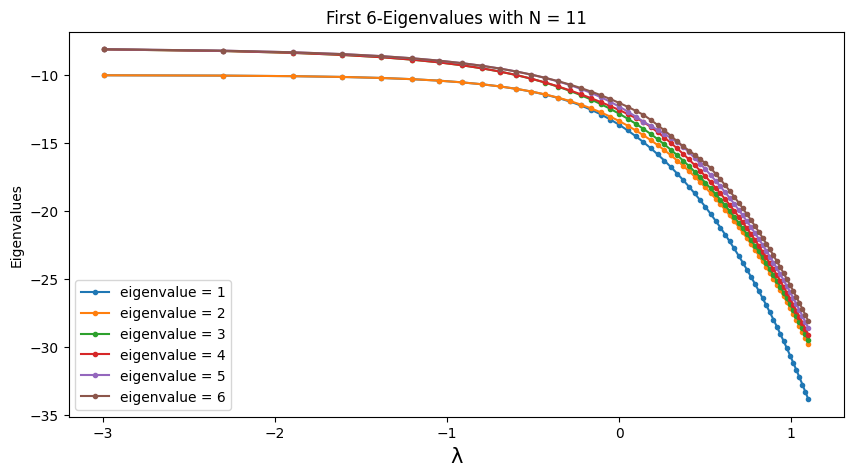

In [559]:
for ii in np.arange(0,10,1):
    plot_log_eigen(N_eigen[ii], ii)

In [556]:
def plot_dif_eigen(eigen, idx):

    #popt, pcov = curve_fit(linear, list_sep, sep_time) #, p0 = [1., 0.])
    #err = np.sqrt(pcov)
    plt.figure(figsize=(10, 5))
    plt.title(f"difference respect to E{idx} - E0")
    plt.ylabel("Eigenvalues")
    plt.xlabel("\u03BB", fontsize = 15)

    for ii in np.arange(1,10,1):
        plt.plot(np.log(eigen[2, :, 0]), eigen[ii, :, idx+1]- eigen[ii, :, 1], marker='.', label = f'eigenvalue = {ii}') #'#002FD0'

    plt.legend()
    plt.savefig(f'./Plots/differenceE0E{idx}.png', bbox_inches="tight")
    plt.show()

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_20379/1540986530.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(eigen[2, :, 0]), eigen[ii, :, idx+1]- eigen[ii, :, 1], marker='.', label = f'eigenvalue = {ii}') #'#002FD0'


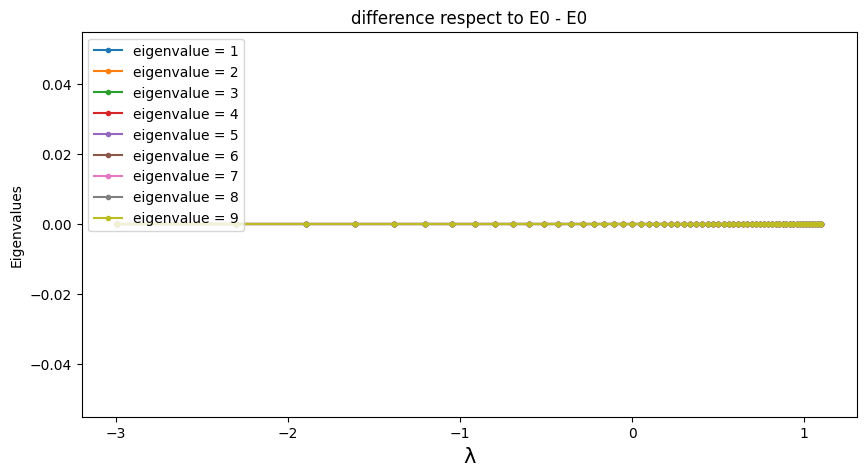

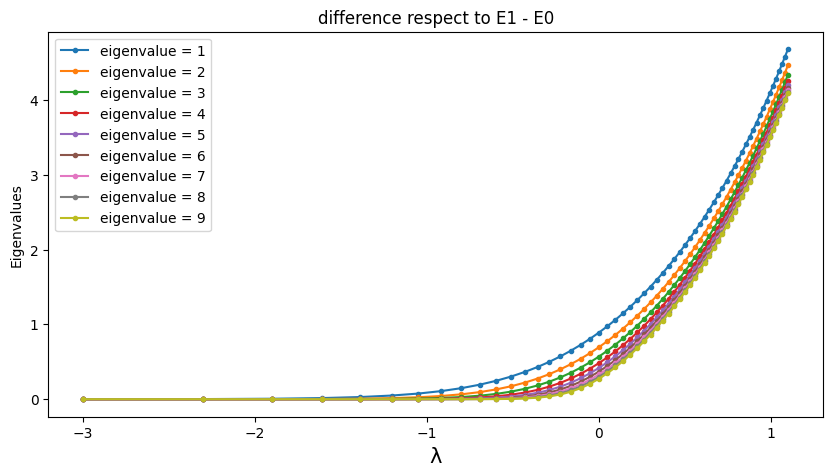

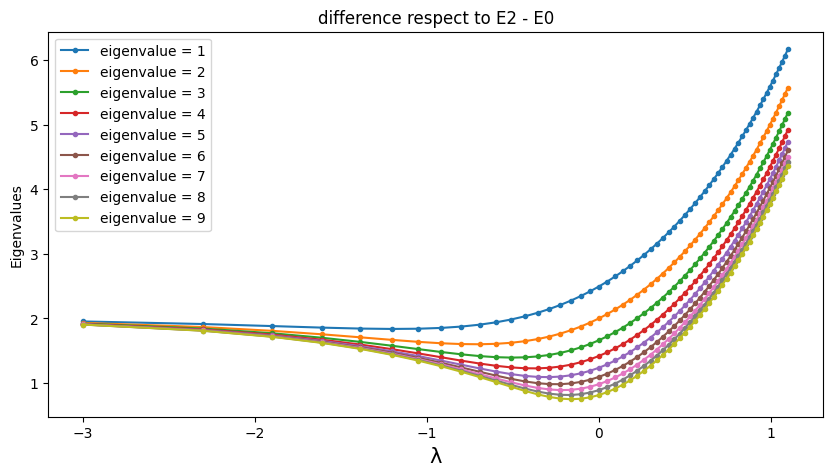

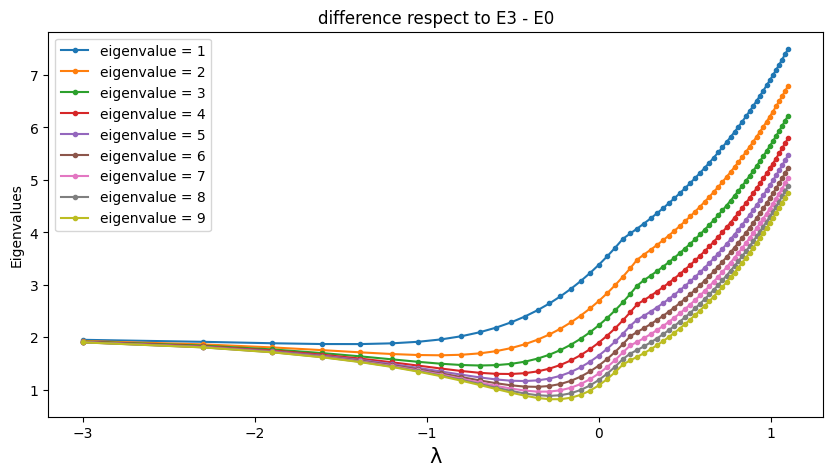

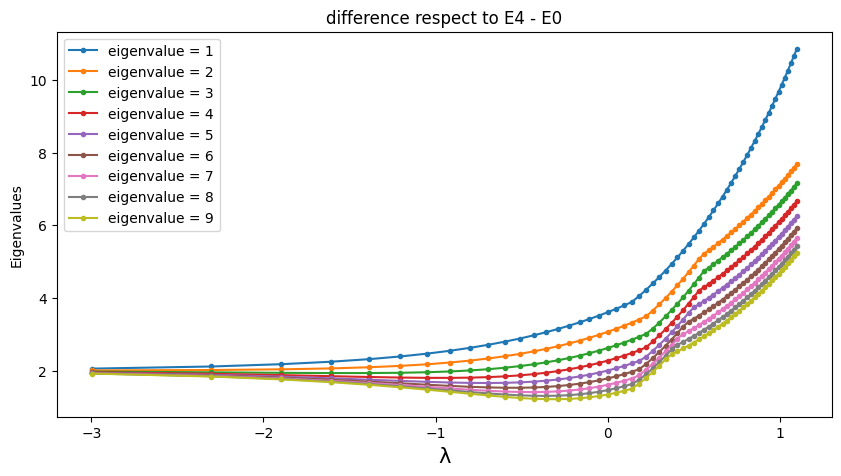

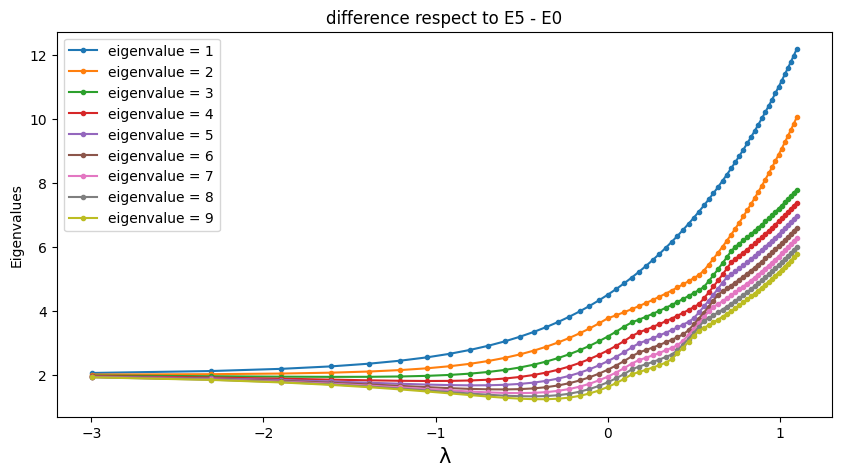

In [558]:
for ii in np.arange(0,6,1):
    plot_dif_eigen(N_eigen, ii)